## Sales Trend Detection by Dynamic Time Warping

### データの準備
811製品の52週間の売り上げ履歴のデータ [Sales_Transactions_Dataset_Weekly Data Set](https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly) を利用します。ダウンロードしたCSVを /FileStore/tables にアップロードします。

In [3]:
%fs cp /FileStore/tables/Sales_Transactions_Dataset_Weekly.csv file:/databricks/driver/sales.csv

res0: Boolean = true

In [4]:
# 画像の保存パスを指定
img_path = "/dbfs/mnt/databricks-fs/image/"

In [5]:
import pandas as pd

sales_dbfspath="./sales.csv"
sales_pdf = pd.read_csv(sales_dbfspath, header='infer')[:100]
display(spark.createDataFrame(sales_pdf))

Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10,3,21,0.44,0.5,0.39,0.28,0.56,0.5,0.61,1.0,0.17,0.61,0.44,0.61,0.72,0.33,0.33,0.33,0.61,0.33,0.0,0.5,0.11,0.44,0.22,0.5,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.5,0.17,0.11,0.61,0.39,0.33,0.5,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.5,0.0,0.22,0.17,0.11,0.39
P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0,0,10,0.7,0.6,0.3,0.2,0.7,0.1,0.6,0.3,0.3,0.3,0.2,0.2,0.6,0.2,0.0,0.6,0.2,0.7,0.7,0.9,0.4,0.7,0.2,0.4,0.5,0.3,0.5,0.8,0.5,0.5,0.3,0.1,0.3,0.2,0.3,1.0,0.5,0.2,0.7,0.3,0.2,0.5,0.2,0.4,0.5,0.1,0.1,0.4,0.5,0.1,0.6,0.0
P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7,3,14,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,1.0,0.55,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.0,0.18,0.0,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.0,0.18,0.27,1.0,0.18,0.18,0.36,0.45,1.0,0.45,0.45,0.36
P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8,2,19,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,0.35,0.12,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.0,0.24,0.29,0.0,0.18,0.59,0.18,1.0,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9,3,18,0.33,0.13,0.67,0.53,0.2,0.27,0.4,0.73,0.4,0.4,0.53,1.0,0.33,0.07,0.67,0.33,0.47,0.8,0.2,0.67,0.53,0.2,0.47,0.4,0.33,0.6,0.33,0.4,0.67,0.0,0.13,0.0,0.13,0.13,0.4,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.6,0.2,0.2,0.13,0.53,0.33,0.4
P6,3,3,2,7,6,3,8,6,6,3,1,1,5,4,3,5,3,5,10,8,4,9,7,5,4,2,1,3,2,4,0,3,2,11,2,1,4,4,3,2,5,4,4,2,4,3,6,5,3,3,10,6,0,11,0.27,0.27,0.18,0.64,0.55,0.27,0.73,0.55,0.55,0.27,0.09,0.09,0.45,0.36,0.27,0.45,0.27,0.45,0.91,0.73,0.36,0.82,0.64,0.45,0.36,0.18,0.09,0.27,0.18,0.36,0.0,0.27,0.18,1.0,0.18,0.09,0.36,0.36,0.27,0.18,0.45,0.36,0.36,0.18,0.36,0.27,0.55,0.45,0.27,0.27,0.91,0.55
P7,4,8,3,7,8,7,2,3,10,3,5,2,3,4,5,3,7,10,0,3,7,5,1,5,7,5,2,4,3,1,3,2,2,4,2,6,4,5,1,3,5,8,2,3,3,6,2,6,2,4,2,1,0,10,0.4,0.8,0.3,0.7,0.8,0.7,0.2,0.3,1.0,0.3,0.5,0.2,0.3,0.4,0.5,0.3,0.7,1.0,0.0,0.3,0.7,0.5,0.1,0.5,0.7,0.5,0.2,0.4,0.3,0.1,0.3,0.2,0.2,0.4,0.2,0.6,0.4,0.5,0.1,0.3,0.5,0.8,0.2,0.3,0.3,0.6,0.2,0.6,0.2,0.4,0.2,0.1
P8,8,6,10,9,6,8,7,5,10,10,8,8,15,9,5,11,10,7,13,9,12,11,5,11,11,12,3,10,12,9,9,10,8,9,8,9,15,6,7,8,3,9,10,14,4,8,8,6,7,4,9,9,3,15,0.42,0.25,0.58,0.5,0.25,0.42,0.33,0.17,0.58,0.58,0.42,0.42,1.0,0.5,0.17,0.67,0.58,0.33,0.83,0.5,0.75,0.67,0.17,0.67,0.67,0.75,0.0,0.58,0.75,0.5,0.5,0.58,0.42,0.5,0.42,0.5,1.0,0.25,0.33,0.42,0.0,0.5,0.58,0.92,0.08,0.42,0.42,0.25,0.33,0.08,0.5,0.5
P9,14,9,10,7,11,15,12,7,13,12,15,15,16,10,9,9,13,8,10,18,18,17,10,16,14,10,4,7,7,10,3,13,9,7,9,8,7,9,15,8,9,8,11,5,13,3,7,7,10,12,7,13,3,18,0.7

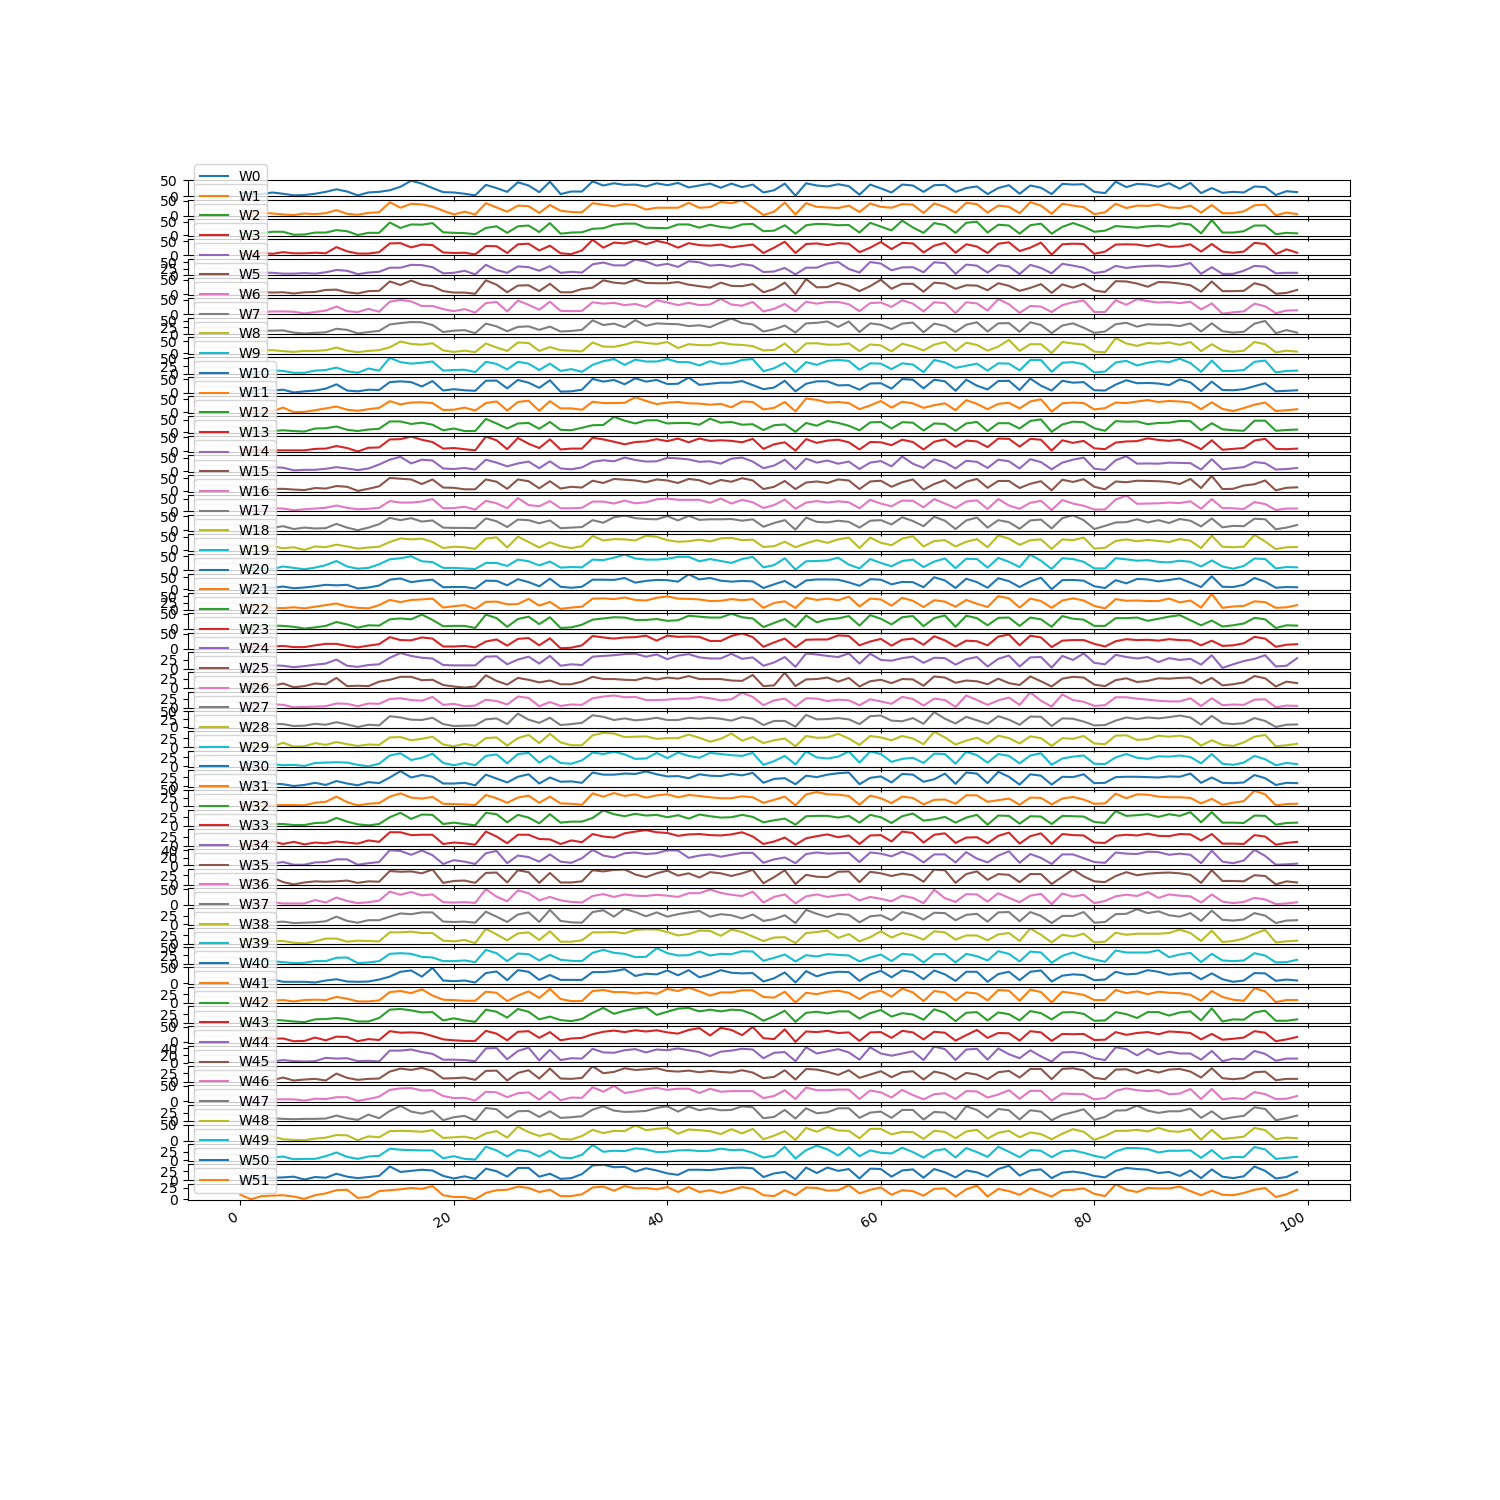

In [6]:
import matplotlib.pyplot as plt

plt.clf()
plt.figure()
sales_pdf.iloc[:,:53].plot(subplots=True, sharex=True, figsize=(15,15))
plt.savefig(img_path+"salestrend-line.png")
display(plt.show())

### DTW 距離行列の作成

In [8]:
from dtaidistance import dtw
import numpy as np

ds = dtw.distance_matrix_fast(sales_pdf.iloc[:,1:].values[:,:52],compact=False)
print(ds)

[[ inf 32.75667871 18.57417562 ... 32.87856445 17.4642492
 28.86173938]
 [ inf inf 25.07987241 ... 12.24744871 30.72458299
 47.61302343]
 [ inf inf inf ... 24. 18.16590212
 31.48015248]
 ...
 [ inf inf inf ... inf 30.28200786
 45.51922671]
 [ inf inf inf ... inf inf
 27.18455444]
 [ inf inf inf ... inf inf
 inf]]

#### Matplotlib による可視化

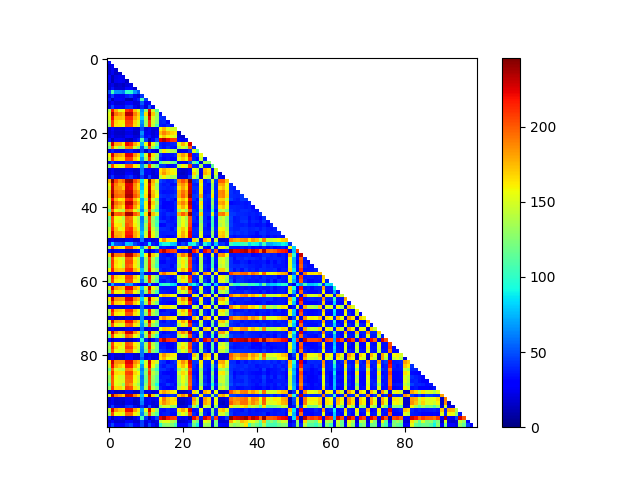

In [10]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure()
plt.imshow(ds.T,interpolation='nearest',vmin=0,cmap='jet')
plt.colorbar()
plt.savefig(img_path+"matplotlib-heatmap.png")
fig = plt.show()
display(fig)

#### Seaborn による可視化

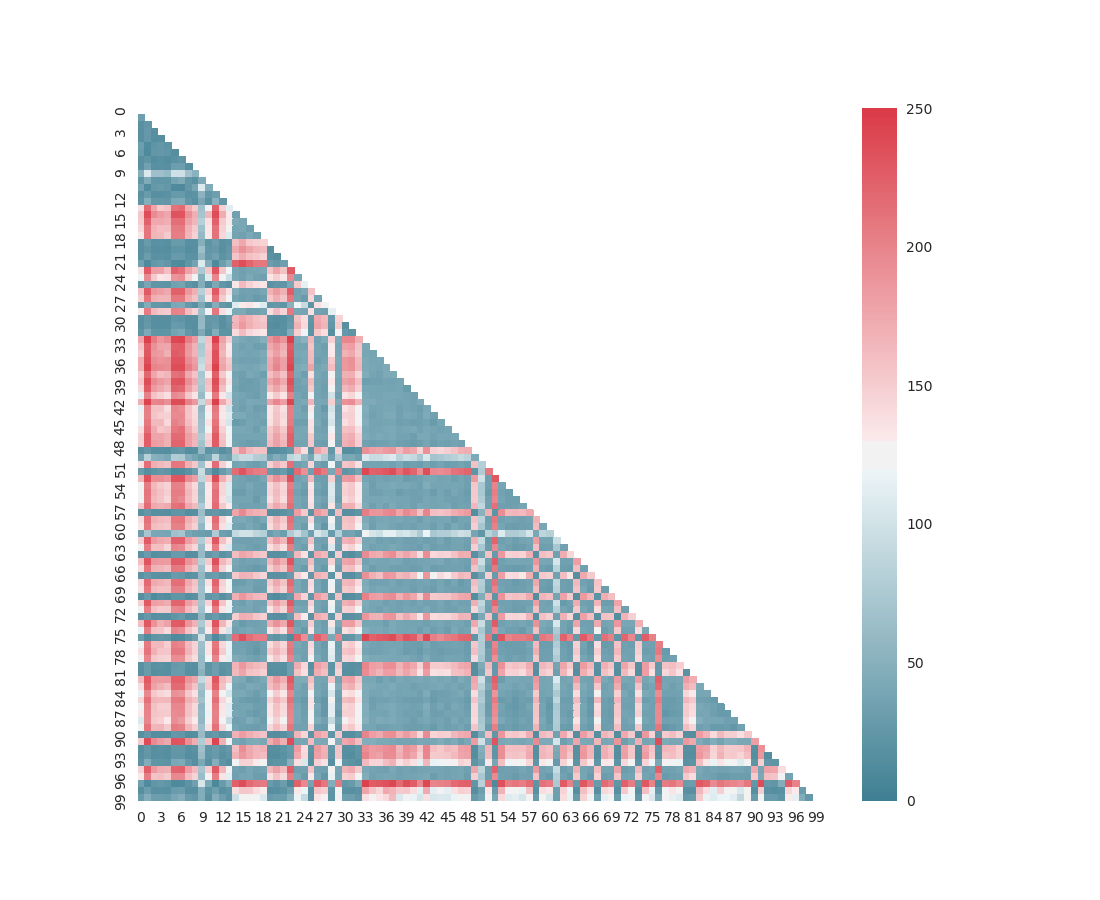

In [12]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

mask = np.zeros_like(ds, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.clf()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = sns.heatmap(ds.T, mask=mask, vmin=0, vmax=250, cmap=cmap)

plt.savefig(img_path+"seaborn-heatmap.png")
display(f)

### 階層型クラスタリングの営業トレンドのグルーピング

In [14]:
from dtaidistance import clustering

model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(sales_pdf.iloc[:,1:].values[:,:52])

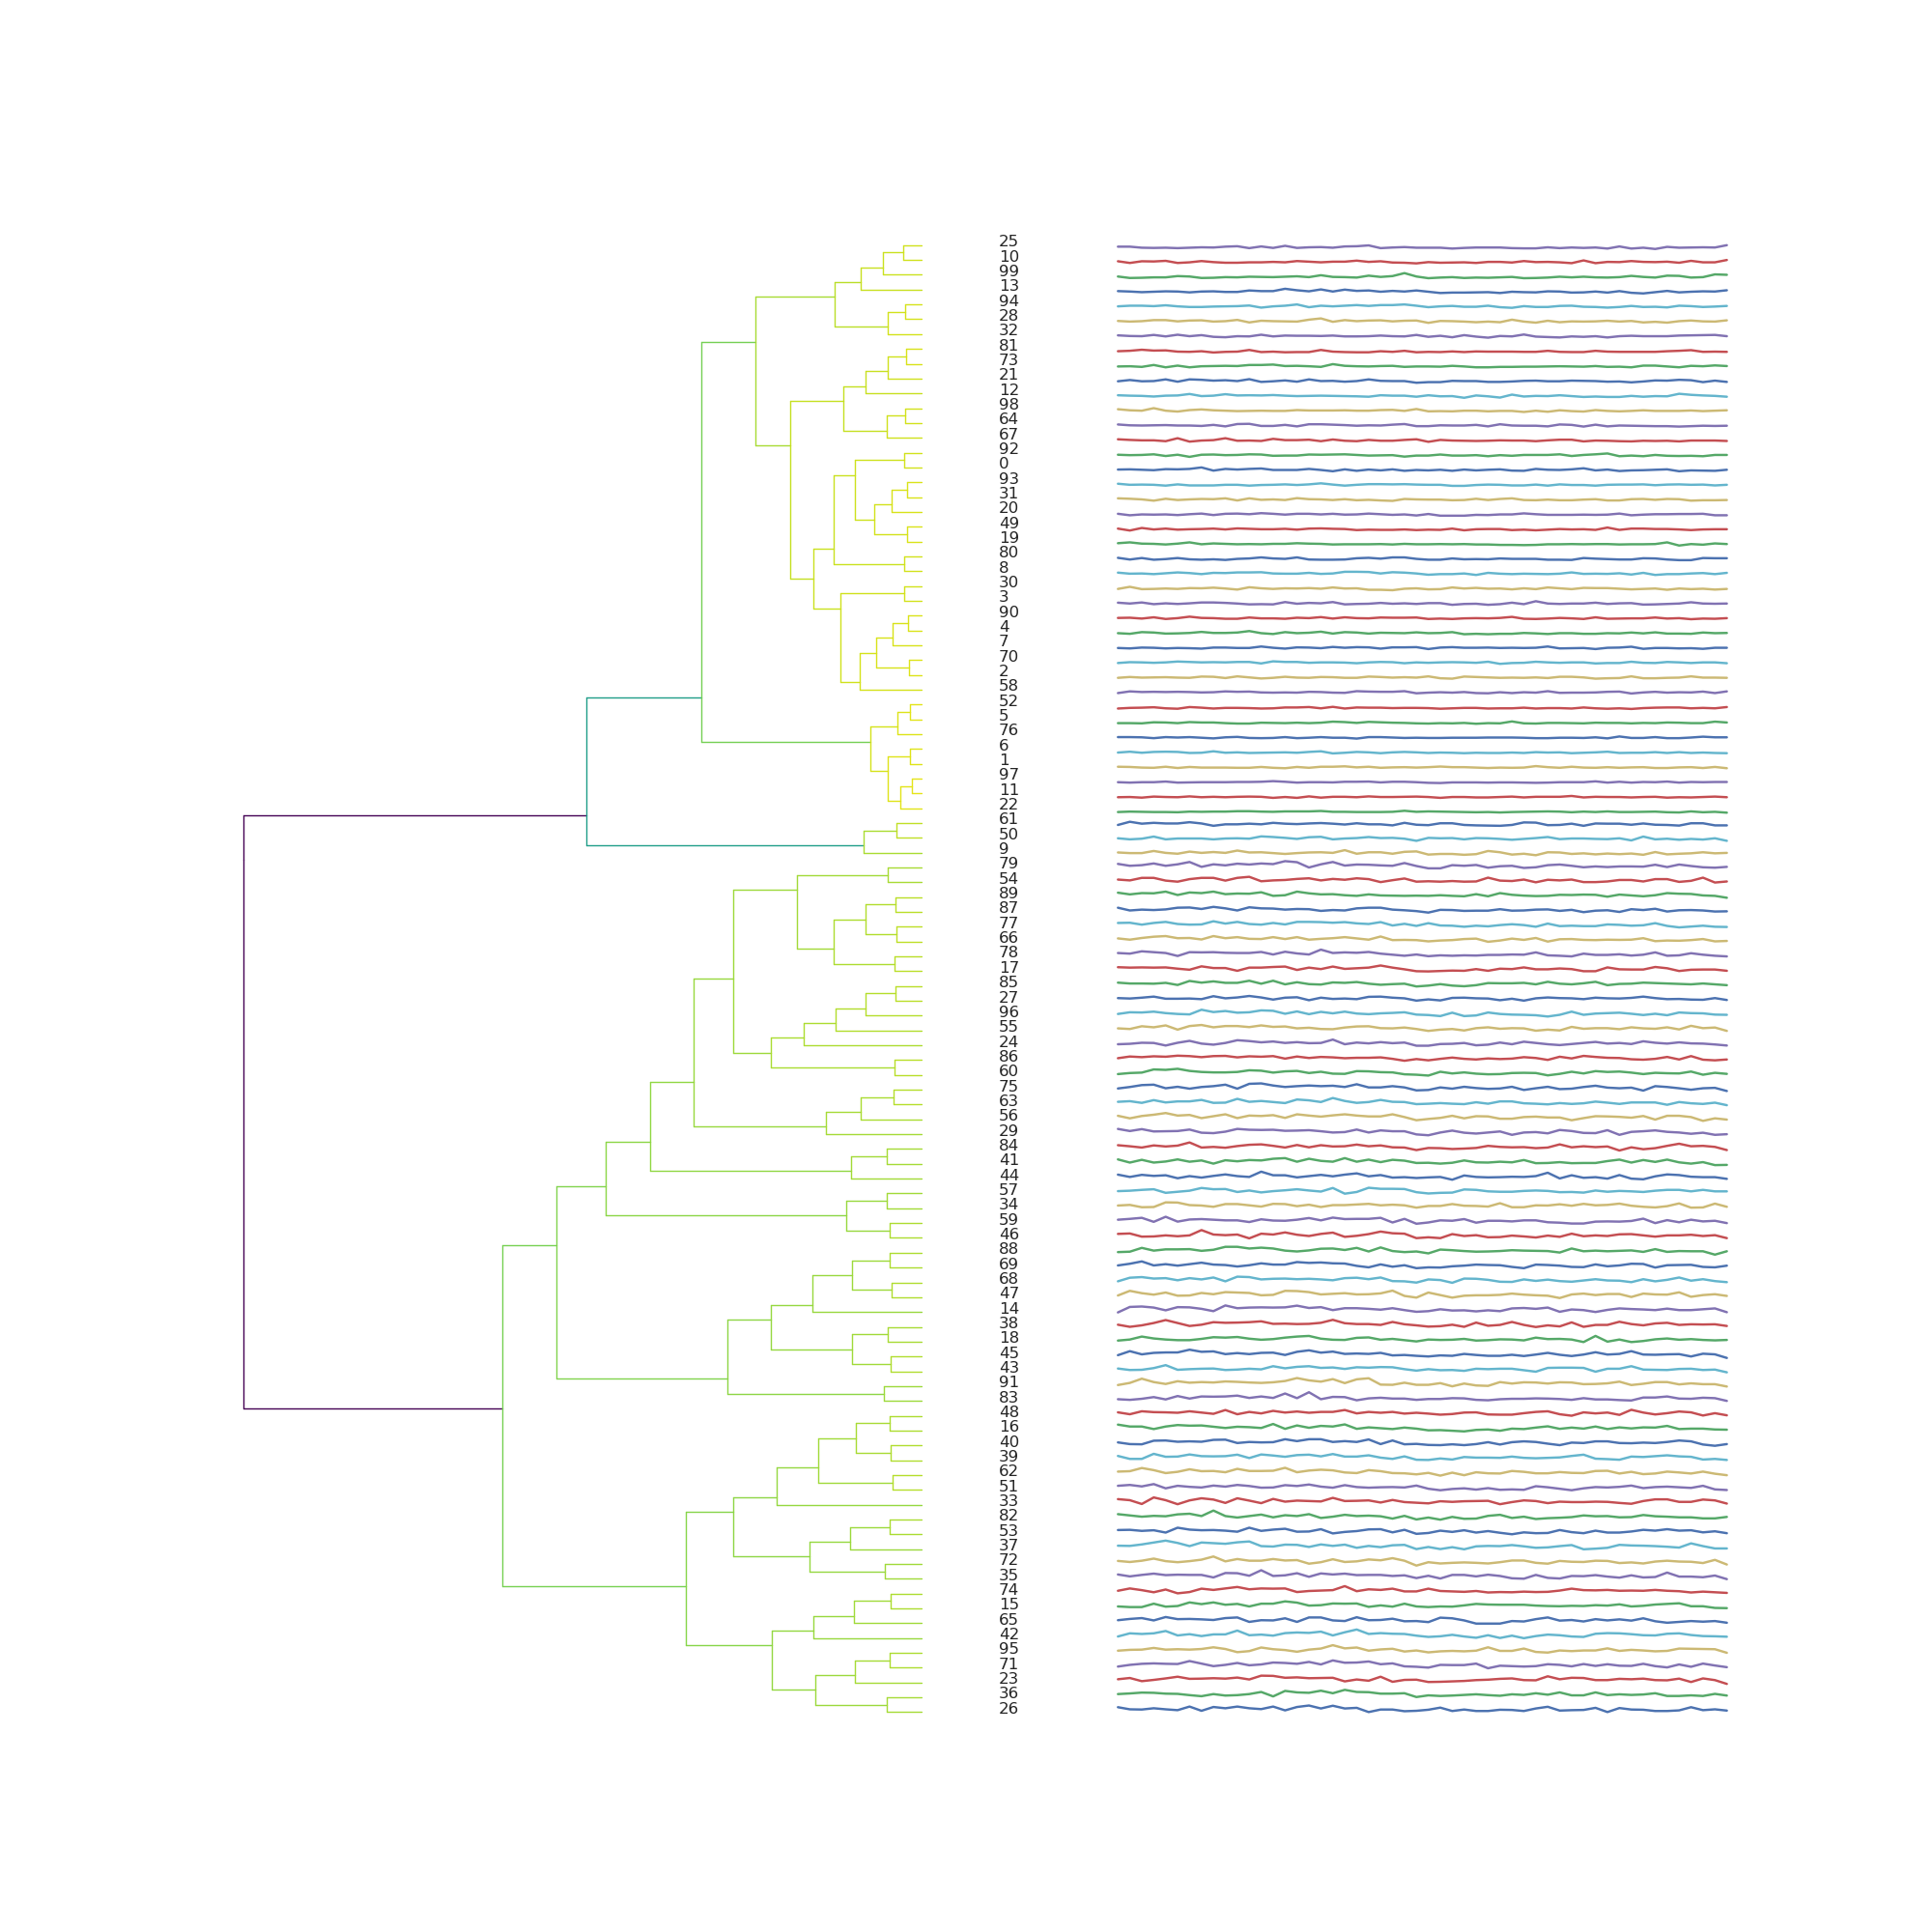

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
show_ts_label = lambda idx: "ts-" + str(idx)
ax = model3.plot(img_path+"hierarchy-scipy.png", axes=ax, show_ts_label=True,
           show_tr_label=False, ts_label_margin=-10,
           ts_left_margin=5, ts_sample_length=1)
display(fig)

In [16]:
# from PIL import Image

# import numpy as np
# im = Image.open(img_path+"hierarchy-scipy.png")
# im_list = np.asarray(im)

# plt.clf()
# plt.figure(figsize=(30, 30))
# plt.imshow(im_list)
# display(plt.show())